### Undersanding the data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [3]:
# Reading the data

ds = pd.read_csv('day.csv')
ds.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
ds.shape

(730, 16)

In [5]:
ds.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# Lets check if there are null values in column data

ds.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
# Rename the columns to understand better

ds.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)
ds.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
# Copying the dataframe into new

ds_copy = ds.copy()
ds_copy.shape

(730, 16)

In [10]:
# dropping the duplicates

ds_copy.drop_duplicates(inplace=True)

In [11]:
# re-verifying the shape of new dataframe

ds_copy.shape

(730, 16)

##### No duplicates found, we can directly use the original dataset

#### Dropping the columns 'instant','dteday','casual','registered' since they are not adding any value


In [12]:
ds.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

#### Mapping the columns "season', 'month','weekday','weathersit' with meaningful values

In [13]:
ds.season = ds.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
ds.month = ds.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
ds.weekday = ds.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
ds.weathersit = ds.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})
ds.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Visualizing the data

#### Checking the relationship of the predictor and the target variable

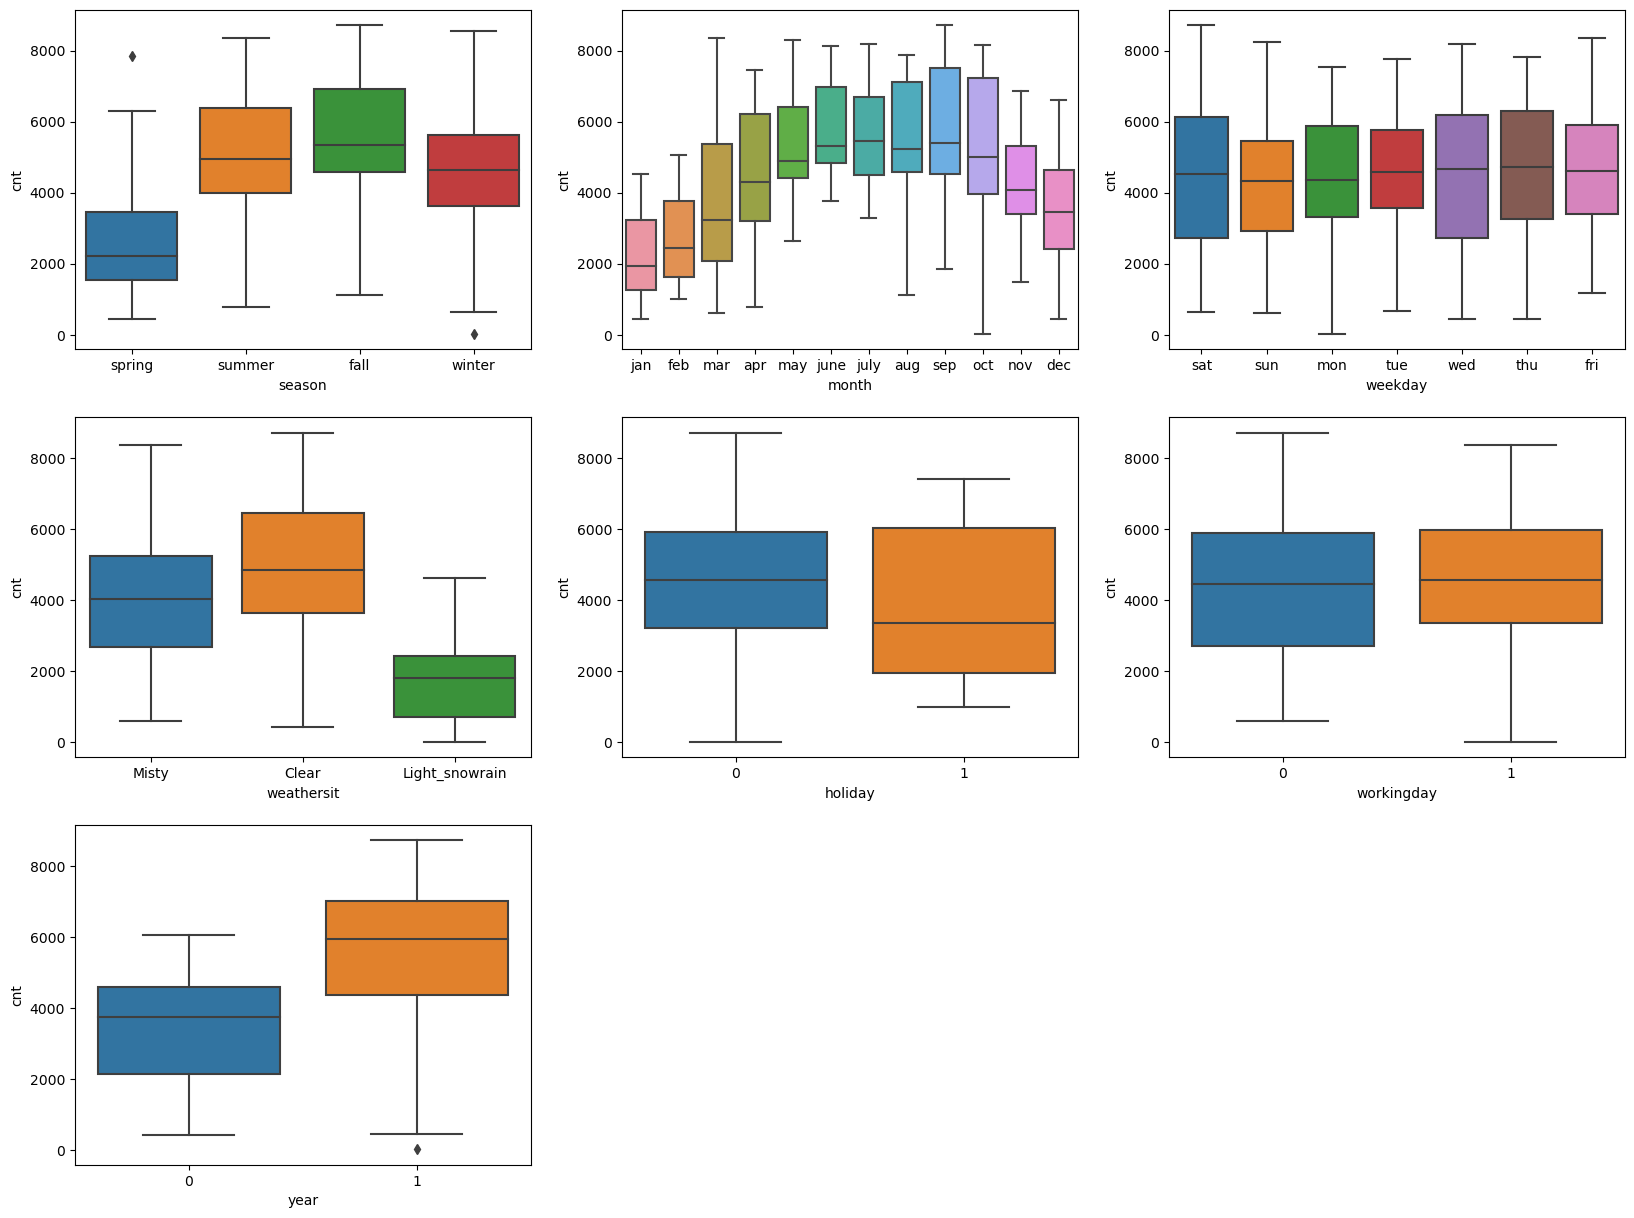

In [14]:
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = ds)
plt.subplot(3,3,2)
sns.boxplot(x = 'month', y = 'cnt', data = ds)
plt.subplot(3,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = ds)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = ds)
plt.subplot(3,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = ds)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = ds)
plt.subplot(3,3,7)
sns.boxplot(x = 'year', y = 'cnt', data = ds)
plt.show()

In [15]:
# Lets define a function to create barplot of a given column vs cnt column

def get_barplot(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(x = column, y = 'cnt',data=ds)
    plt.subplot(1,2,2)
    sns.barplot(x = column, y = 'cnt',data=ds, hue='year',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

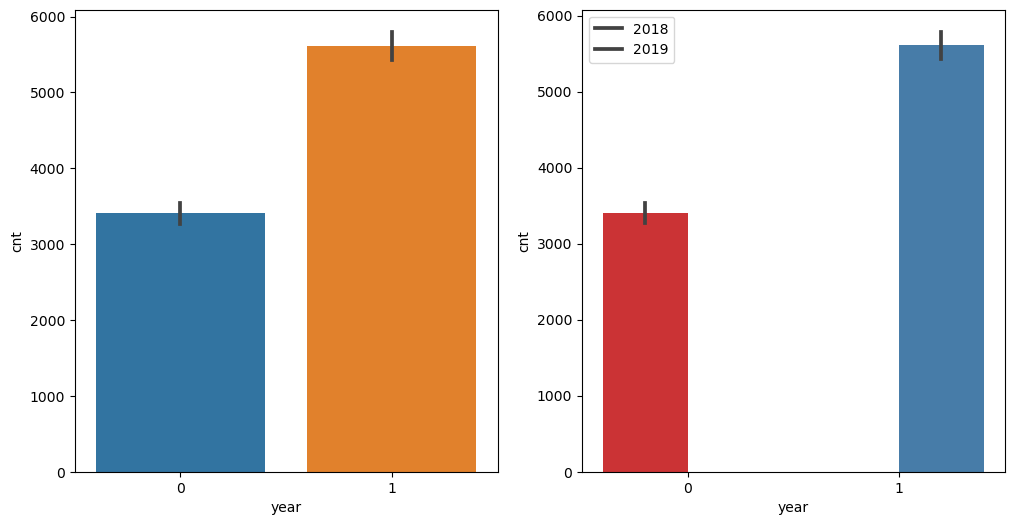

In [16]:
# Visualization for year column

get_barplot('year')

Bike rental business has increased significantly over the years.

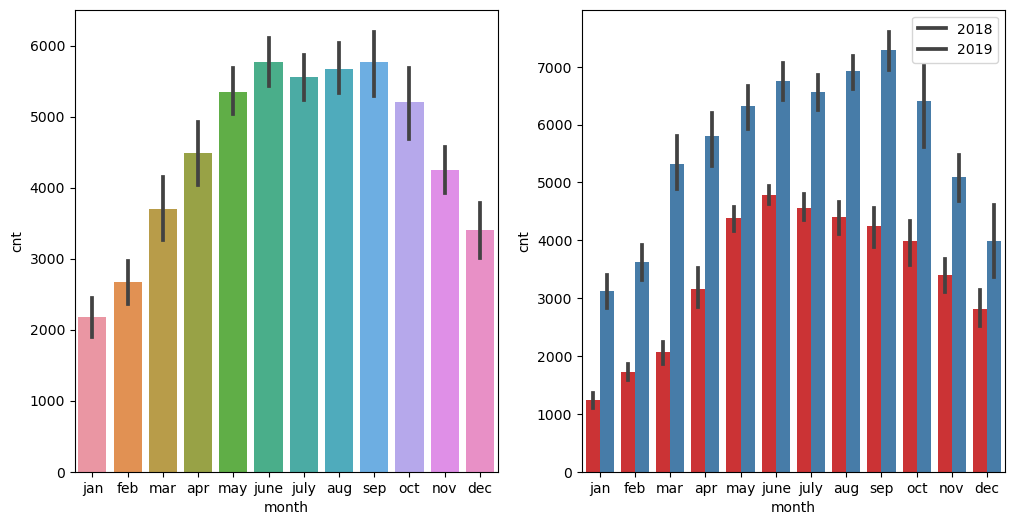

In [17]:
# Visualization for month column

get_barplot('month')

January onwards booking keeps increasing month on month till September, then starts to decrease from October upto December.

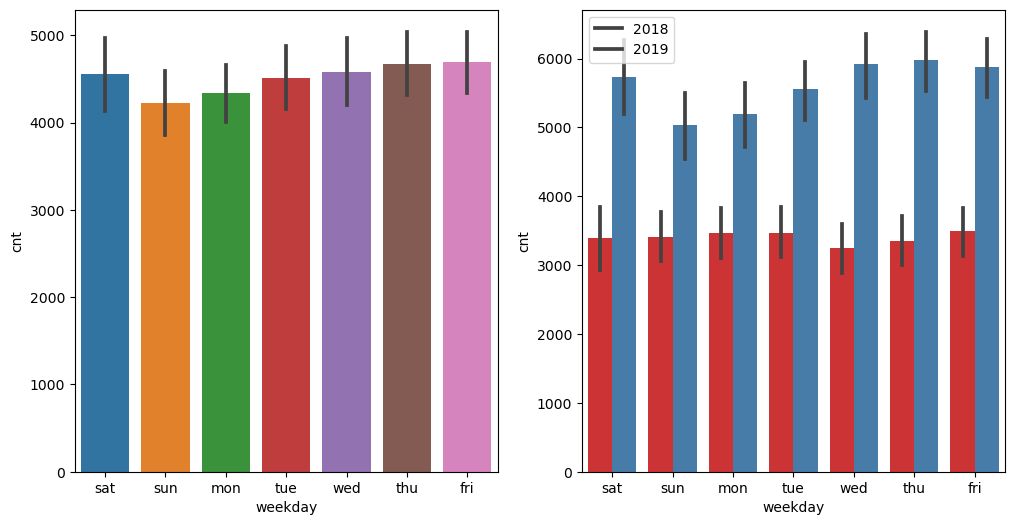

In [18]:
# Visualization for weekday column

get_barplot('weekday')

Booking is lowest on Sundays and gradually increases towards the weekend.

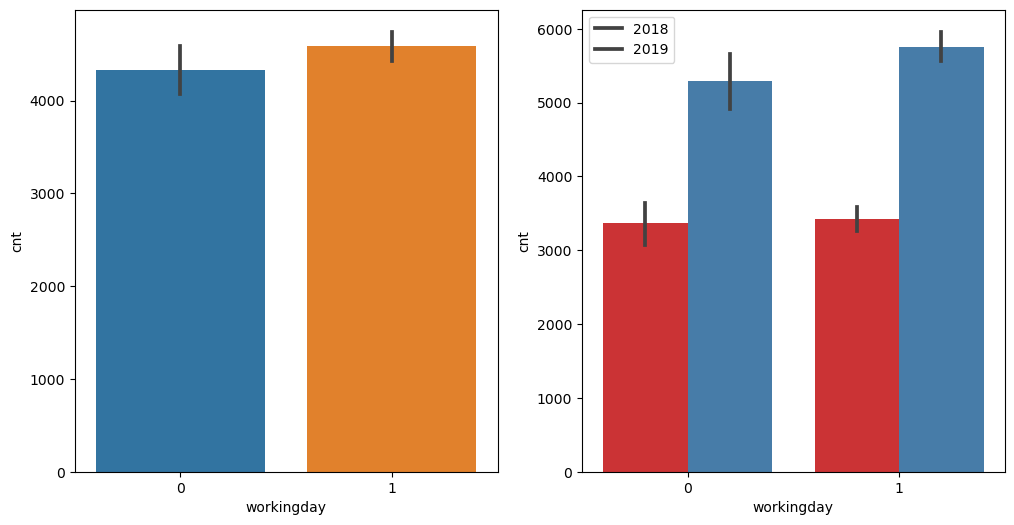

In [19]:
# Visualization for workingday column

get_barplot('workingday')

Working days has more bookings than non-working days.

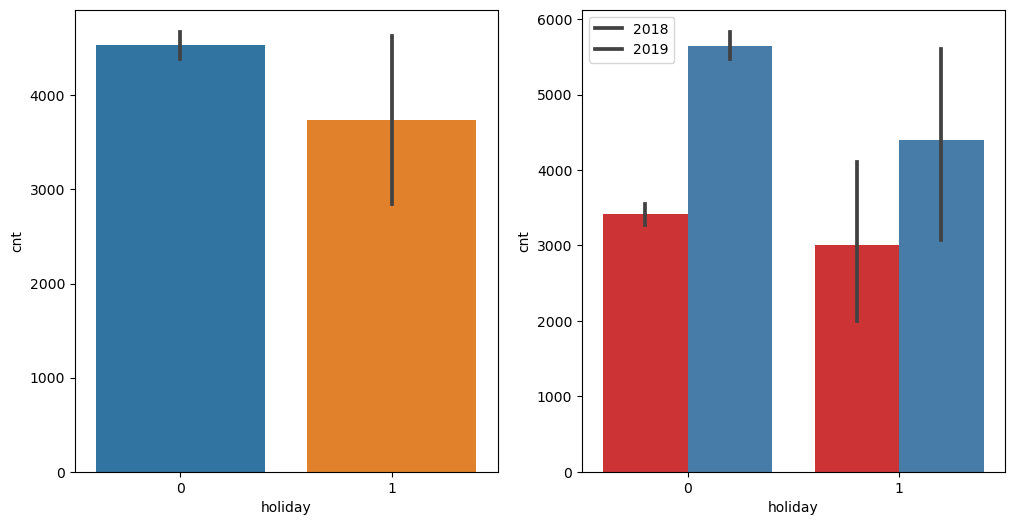

In [20]:
# Visualization for holiday column

get_barplot('holiday')

Holidays seems to be having less booking than non-holidays.

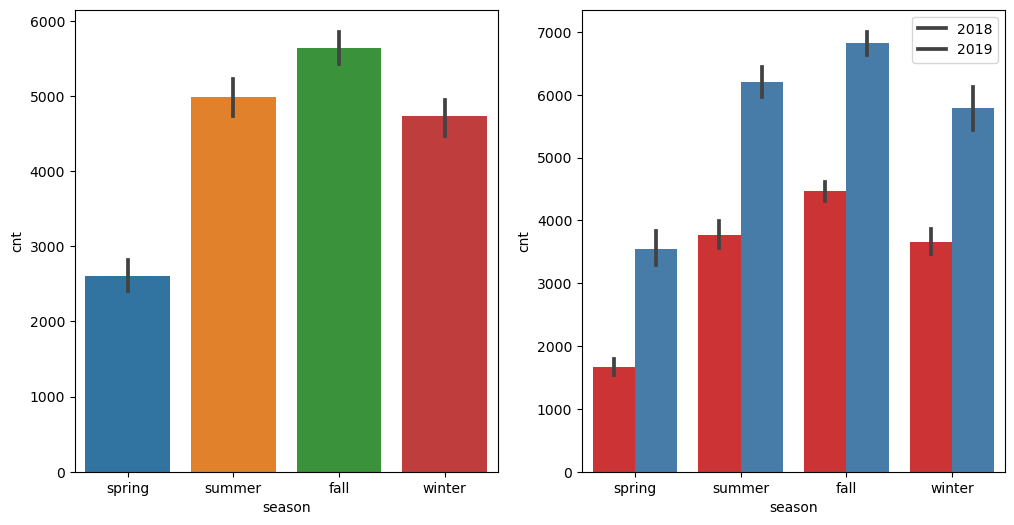

In [21]:
# Visualization for season column

get_barplot('season')

Booking increased spring season onwards, reached its peak during the fall and declined during the winters. The trend increased over the years.

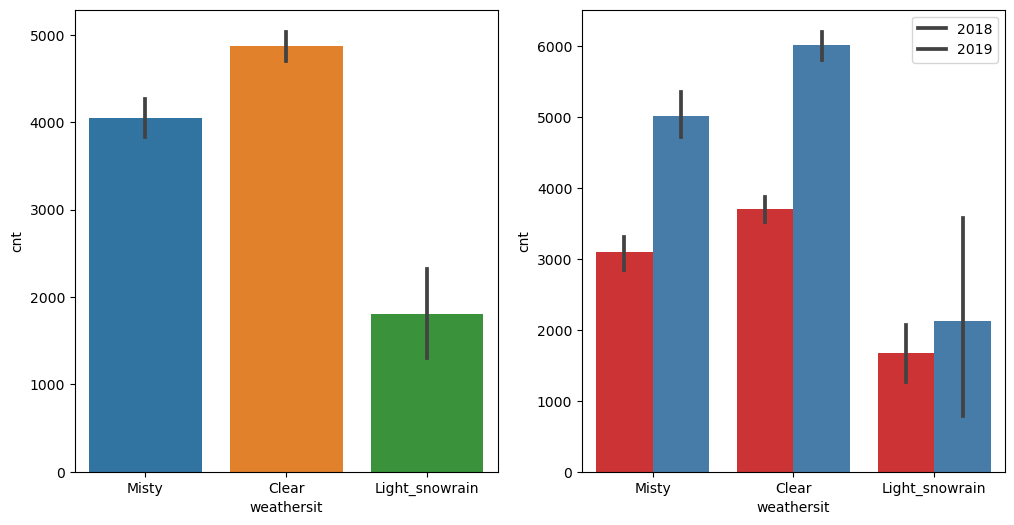

In [22]:
# Visualization for weathersit column

get_barplot('weathersit')

Understandably, booking of bikes increased on those days when weather was clear.

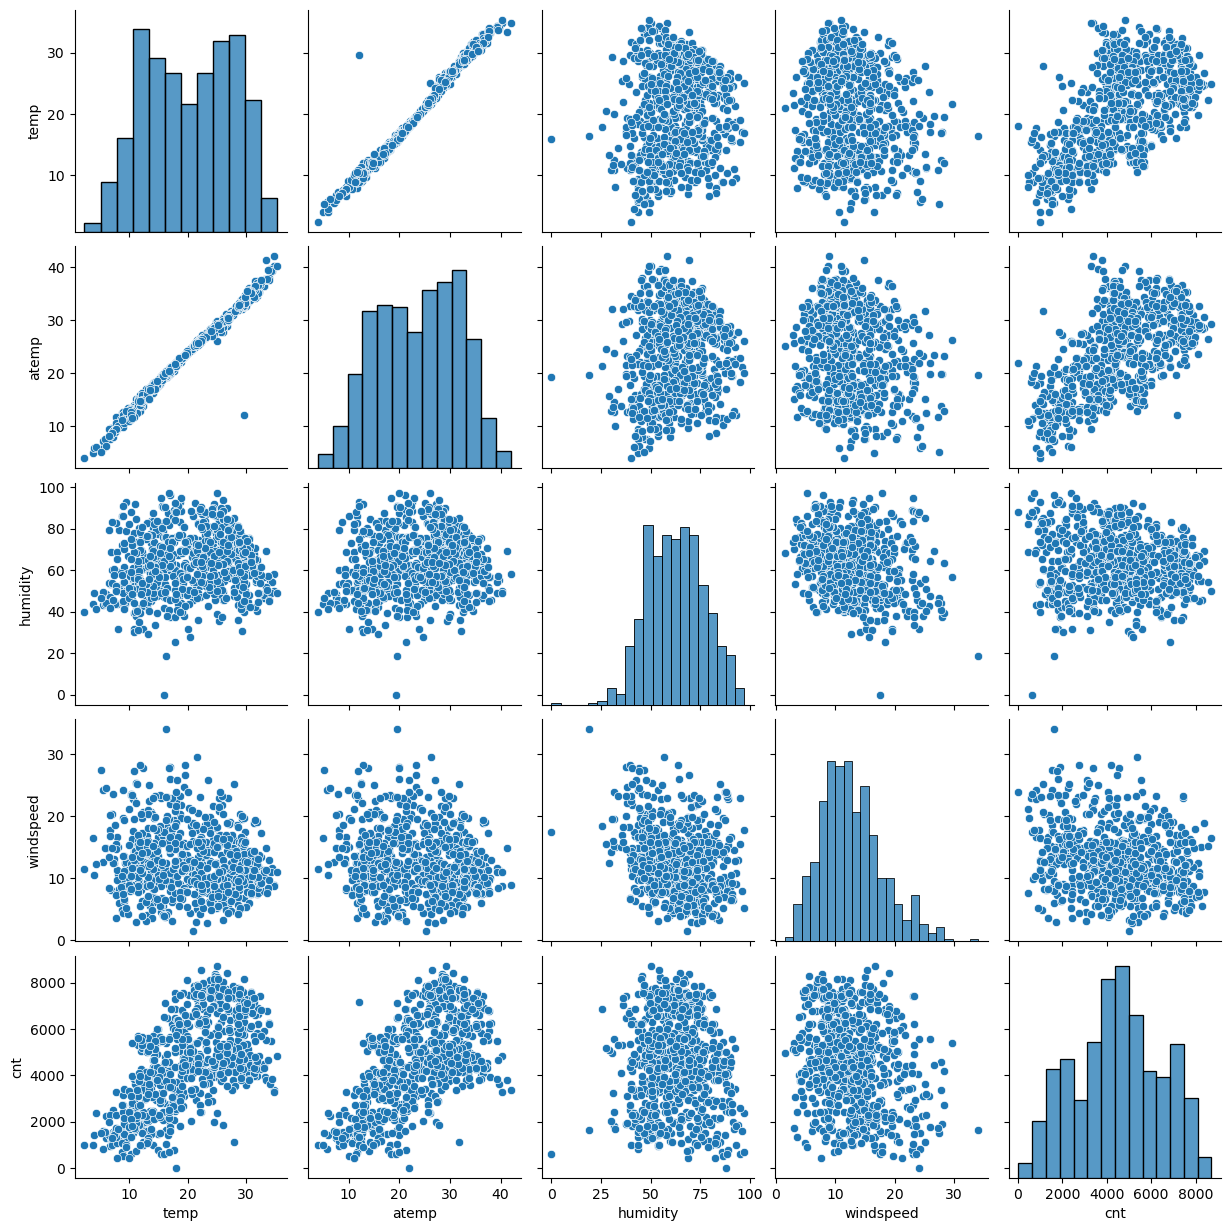

In [23]:
# Visualizing numerical columns
sns.pairplot(data=ds,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

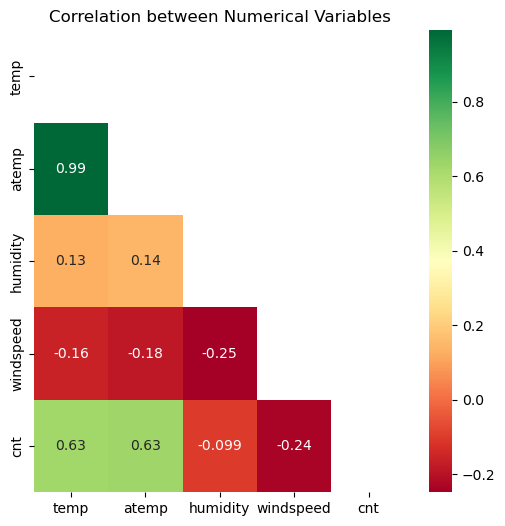

In [24]:
# Checking the correlation between the numerical variables

plt.figure(figsize = (6,6))
matrix = np.triu(ds[['temp','atemp','humidity','windspeed','cnt']].corr())
sns.heatmap(ds[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

We can see there is a linear relationship between temp and atemp, due to that these parameters cannot be used in the model due to multicolinearity. Later we'll verify the VIF and P-value and drop one of them.

### Preparing the data

In [25]:
# Creating dummy variables month, weekday, weathersit and season.

months_ds=pd.get_dummies(ds.month,drop_first=True)
weekdays_ds=pd.get_dummies(ds.weekday,drop_first=True)
weathersit_ds=pd.get_dummies(ds.weathersit,drop_first=True)
seasons_ds=pd.get_dummies(ds.season,drop_first=True)


In [26]:
ds.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [27]:
# Lets merge the dataframe with the dummy variable dataset. 

ds_new = pd.concat([ds,months_ds,weekdays_ds,weathersit_ds,seasons_ds],axis=1)

In [28]:
ds_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [29]:
ds_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   year            730 non-null    int64  
 2   month           730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   humidity        730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  aug             730 non-null    uint8  
 13  dec             730 non-null    uint8  
 14  feb             730 non-null    uint8  
 15  jan             730 non-null    uint8  
 16  july            730 non-null    uint8  
 17  june            730 non-null    uin

In [30]:
# Now we need to drop the unnecessary columns as we have already created dummy variable out of it.

ds_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [31]:
ds_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


In [32]:
ds_new.shape

(730, 30)

In [33]:
ds_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   aug             730 non-null    uint8  
 9   dec             730 non-null    uint8  
 10  feb             730 non-null    uint8  
 11  jan             730 non-null    uint8  
 12  july            730 non-null    uint8  
 13  june            730 non-null    uint8  
 14  mar             730 non-null    uint8  
 15  may             730 non-null    uint8  
 16  nov             730 non-null    uint8  
 17  oct             730 non-null    uin

### Train-Test Data Split

In [34]:
# Splitting the data into Train and Test

np.random.seed(0)
ds_train, ds_test = train_test_split(ds_new, train_size = 0.7, random_state = 100)

In [35]:
# checking the shape of training data

ds_train.shape

(510, 30)

In [36]:
# checking the shape of testing data

ds_test.shape

(220, 30)

In [37]:
#Now we need perform scaling of the data

#Verify the data before scaling
ds_train.head()


,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,0,0,0,0,0,0,1,0,1,0


In [38]:
# Applying the scaling on columns other than dummy and true-false variables

scaler = MinMaxScaler()
num_vars = ['temp','atemp','humidity','windspeed','cnt']
ds_train[num_vars] = scaler.fit_transform(ds_train[num_vars])

#Verify the data after scaling
ds_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


In [39]:
#Verify the data description
ds_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


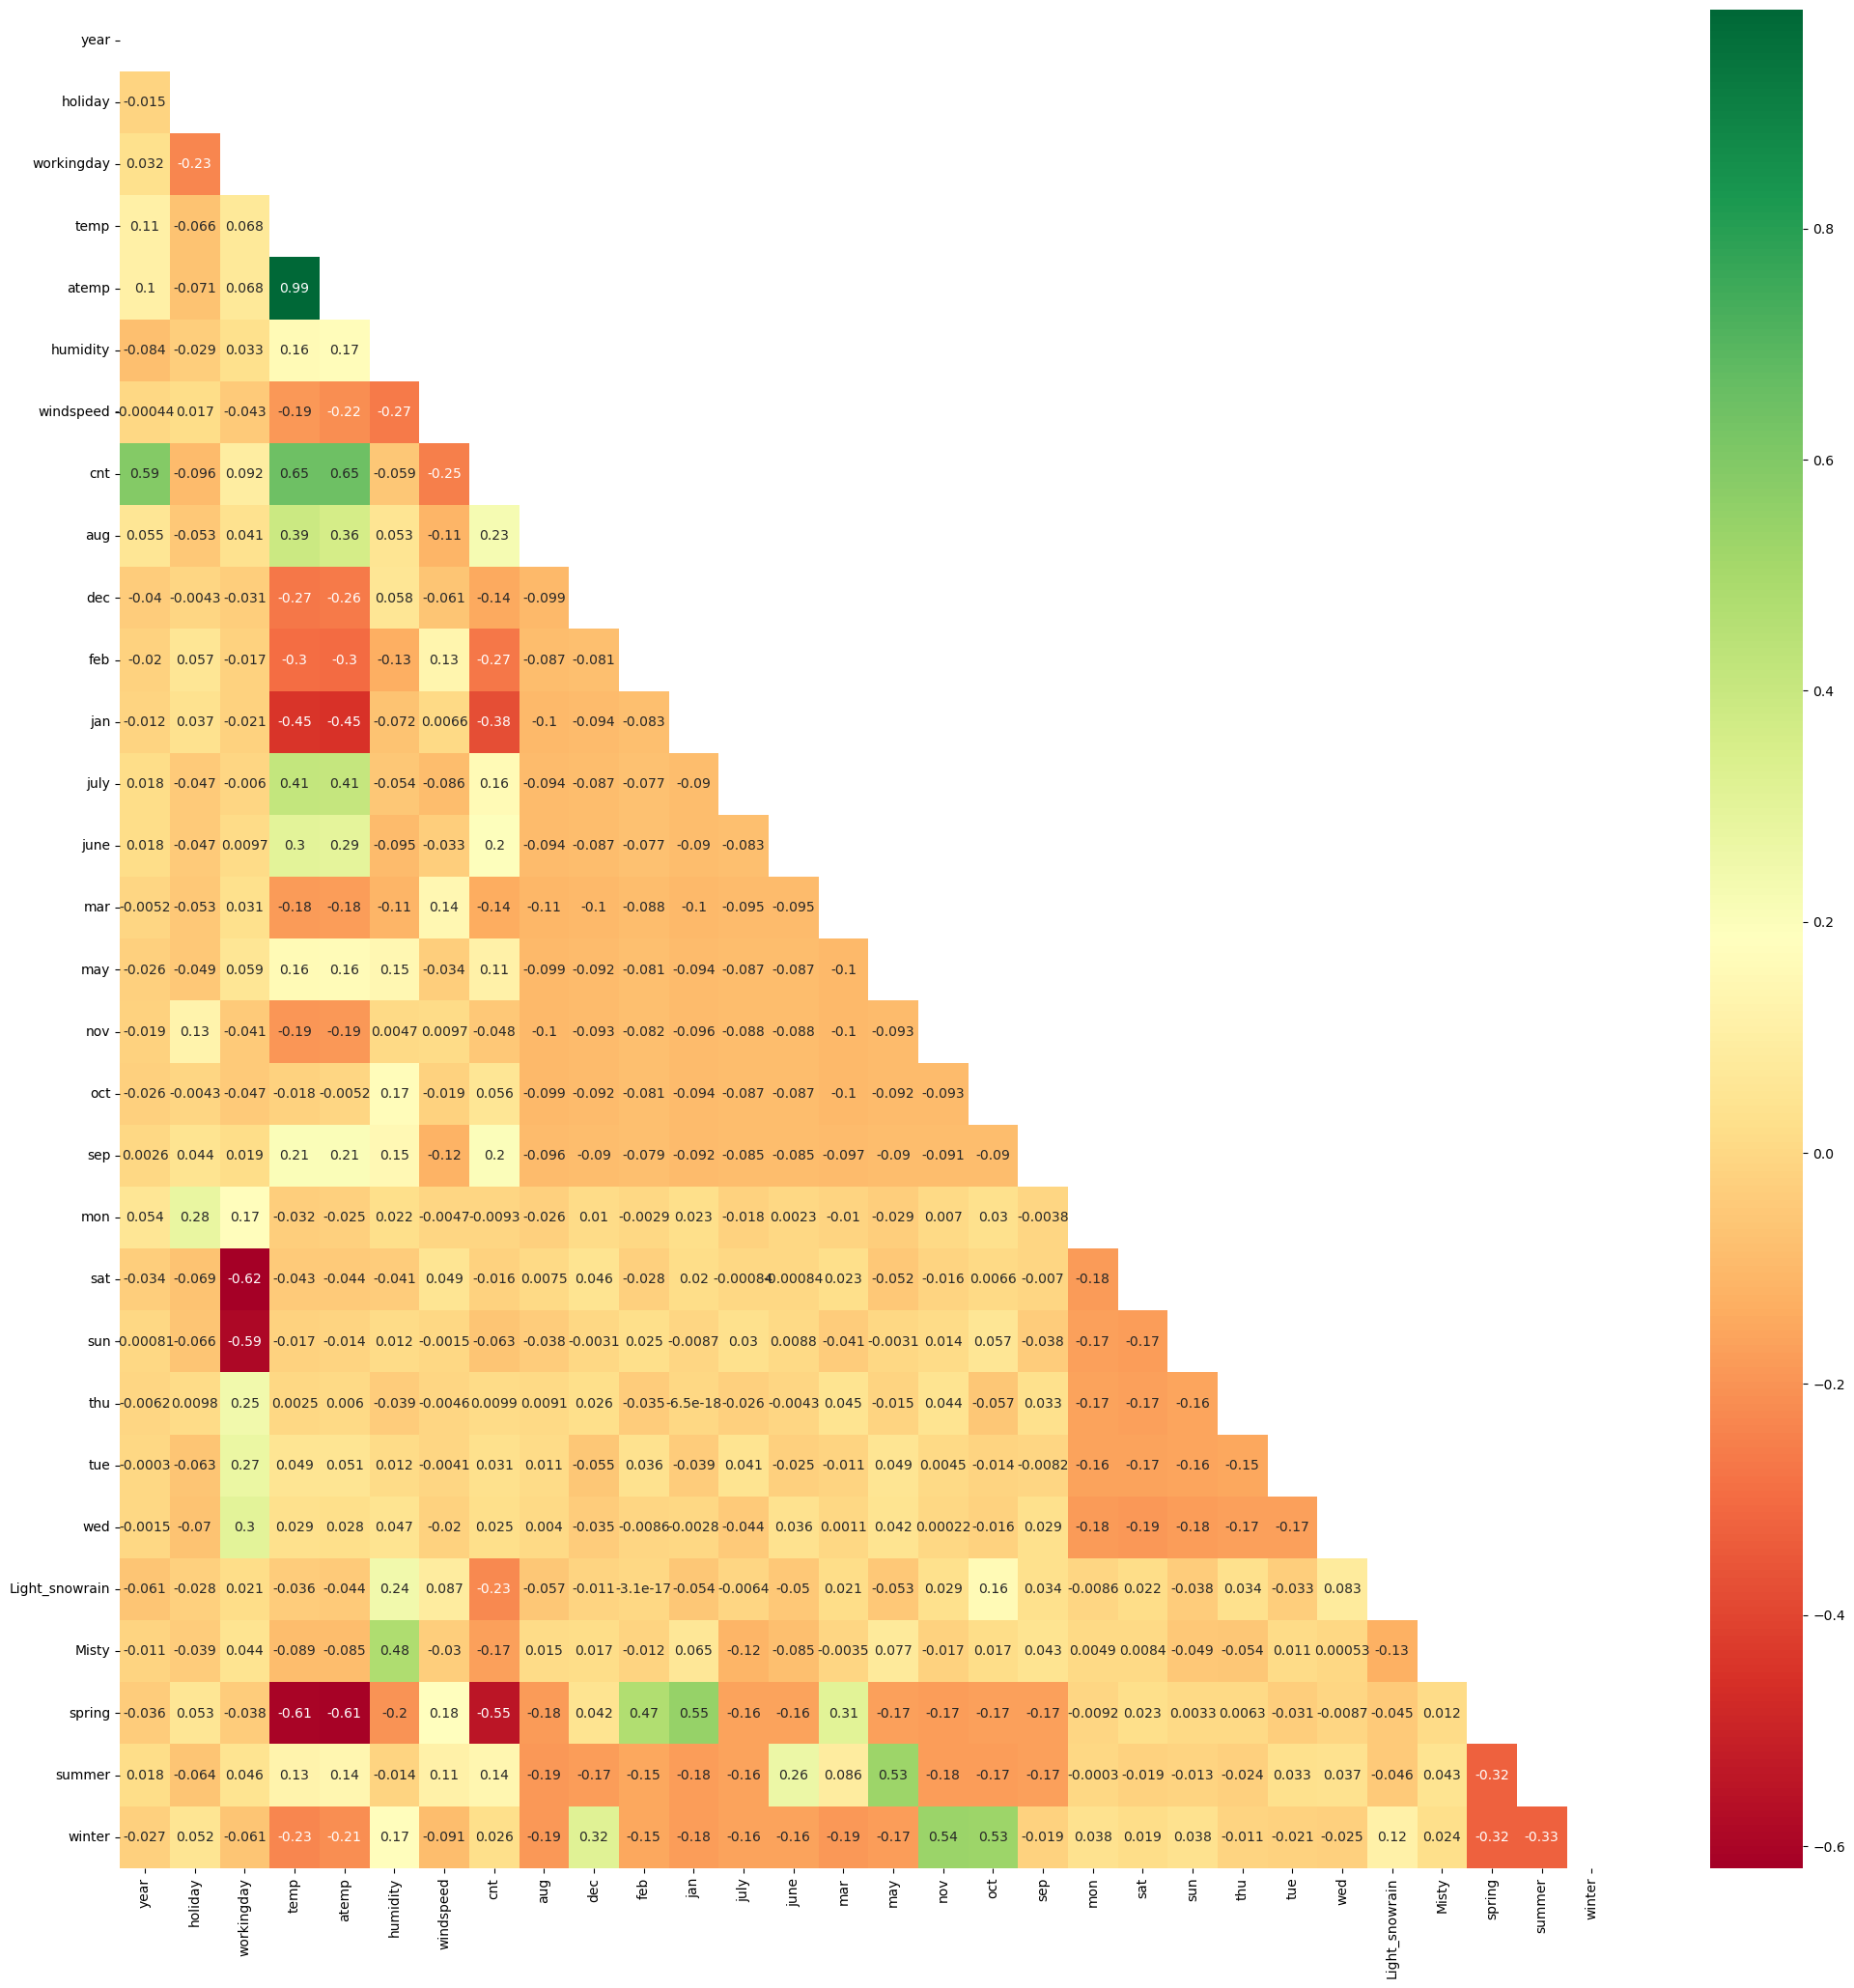

In [40]:
# Verifying the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
matrix = np.triu(ds_train.corr())
sns.heatmap(ds_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

#### Following variables exibits correlation :
#### 1. cnt => year, temp, atemp
#### 2. Misty => humidity
#### 3. spring => jan and feb
#### 4. summer => may
#### 5. winter => oct and nov

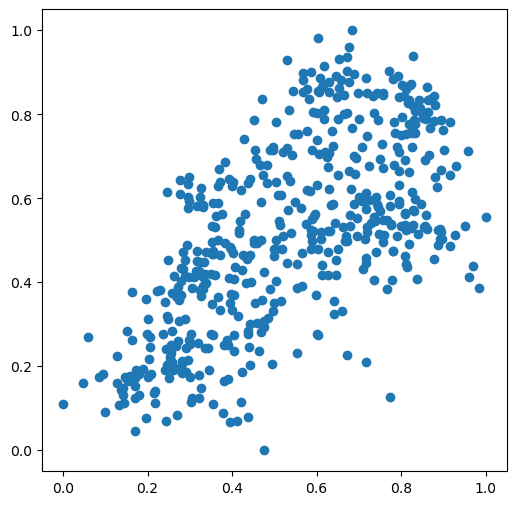

In [41]:
# Visualizing correlation of temp vs. cnt 

plt.figure(figsize=[6,6])
plt.scatter(ds_train.temp, ds_train.cnt)
plt.show()

In [42]:
# Building the Linear Model

y_train = ds_train.pop('cnt')
X_train = ds_train

In [43]:
# Performing recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator = lm, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [44]:
#List of variables selected

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 12),
 ('dec', False, 4),
 ('feb', False, 5),
 ('jan', False, 2),
 ('july', True, 1),
 ('june', False, 14),
 ('mar', False, 11),
 ('may', False, 6),
 ('nov', False, 3),
 ('oct', False, 9),
 ('sep', True, 1),
 ('mon', False, 8),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 10),
 ('tue', False, 7),
 ('wed', False, 13),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', False, 15),
 ('winter', True, 1)]

In [45]:
# Listing the variables chosen through RFE

col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'july', 'sep', 'sat', 'sun', 'Light_snowrain', 'Misty',
       'spring', 'winter'],
      dtype='object')


In [46]:
# Listing the columns which were rejected

X_train.columns[~rfe.support_]

Index(['aug', 'dec', 'feb', 'jan', 'june', 'mar', 'may', 'nov', 'oct', 'mon',
       'thu', 'tue', 'wed', 'summer'],
      dtype='object')

In [47]:
# Define a function to calculate VIF

def getVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [48]:
# Get the dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [49]:
# calculate VIF

getVIF(X_train_rfe)

,Features,VIF
3,temp,52.82
4,atemp,51.48
2,workingday,40.81
9,sat,9.96
10,sun,9.67
13,spring,2.55
1,holiday,2.54
5,humidity,1.90
14,winter,1.79
12,Misty,1.57


temp variable has a high VIF value.

### Building a linear model

In [50]:
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.1
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          8.89e-189
Time:                        20:47:13   Log-Likelihood:                 511.35
No. Observations:                 510   AIC:                            -992.7
Df Residuals:                     495   BIC:                            -929.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2422      0.025      9.

In [51]:
# As temp shows high VIF value hence we can drop it
X_train_new = X_train_rfe.drop(['temp'], axis = 1)

# Run the function to calculate VIF for the new model
getVIF(X_train_new)

,Features,VIF
2,workingday,40.70
8,sat,9.93
9,sun,9.65
3,atemp,2.92
1,holiday,2.53
12,spring,2.49
4,humidity,1.90
13,winter,1.71
11,Misty,1.57
6,july,1.29


In [52]:
# As workingday shows high VIF value hence we can drop it
X_train_new = X_train_new.drop(['workingday'], axis = 1)

# Run the function to calculate VIF for the new model
getVIF(X_train_new)


,Features,VIF
3,humidity,23.08
2,atemp,15.30
4,windspeed,3.99
11,spring,2.50
10,Misty,2.26
0,year,2.05
12,winter,2.03
5,july,1.39
7,sat,1.23
8,sun,1.23


In [53]:
# As humidity shows high VIF value hence we can drop it
X_train_new = X_train_new.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model
getVIF(X_train_new)

,Features,VIF
2,atemp,4.64
3,windspeed,3.95
0,year,2.05
10,spring,1.66
9,Misty,1.52
11,winter,1.43
4,july,1.35
6,sat,1.23
7,sun,1.21
5,sep,1.20


VIF seems to reasonable, now we can check if more variables can be removed based on the P-Value 

In [54]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.5
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          4.92e-186
Time:                        20:47:13   Log-Likelihood:                 499.28
No. Observations:                 510   AIC:                            -972.6
Df Residuals:                     497   BIC:                            -917.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2608      0.024     10.

In [55]:
# We can drop sat variable as it has high p-value
X_train_new = X_train_new.drop(['sat'], axis = 1)

# Run the function to calculate VIF for the new model
getVIF(X_train_new)

,Features,VIF
2,atemp,4.58
3,windspeed,3.91
0,year,2.05
9,spring,1.65
8,Misty,1.52
10,winter,1.41
4,july,1.35
5,sep,1.20
6,sun,1.18
7,Light_snowrain,1.08


In [56]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          5.18e-187
Time:                        20:47:13   Log-Likelihood:                 498.77
No. Observations:                 510   AIC:                            -973.5
Df Residuals:                     498   BIC:                            -922.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2629      0.024     10.

#### From above we can conclude that there is very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.

#### F-Statistics value of 229.6 (which is greater than 1) and the p-value of 5.18e-187 i.e almost equals to zero states that the overall model is significant

In [57]:
# Checking the parameters and their coefficient values
lr_3.params

const             0.262919
year              0.235127
holiday          -0.102303
atemp             0.461913
windspeed        -0.125108
july             -0.065981
sep               0.058356
sun              -0.048253
Light_snowrain   -0.286318
Misty            -0.082276
spring           -0.117963
winter            0.039054
dtype: float64

### Residual analysis of the train data and validation

In [58]:
X_train_lm_3

,const,year,holiday,atemp,windspeed,july,sep,sun,Light_snowrain,Misty,spring,winter
576,1.0,1,0,0.766351,0.264686,1,0,0,0,0,0,0
426,1.0,1,0,0.438975,0.255342,0,0,0,0,1,1,0
728,1.0,1,0,0.200348,0.663106,0,0,1,0,0,1,0
482,1.0,1,0,0.391735,0.188475,0,0,0,0,1,0,0
111,1.0,0,0,0.318819,0.380981,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.824359,0.187140,0,0,0,0,0,0,0
53,1.0,0,0,0.218747,0.111379,0,0,0,0,0,1,0
350,1.0,0,0,0.223544,0.431816,0,0,0,0,1,0,1
79,1.0,0,0,0.434043,0.529881,0,0,0,0,1,0,0


In [59]:
y_train_pred = lr_3.predict(X_train_lm_3)

#### Checking normality of error terms

Text(0.5, 0, 'Errors')

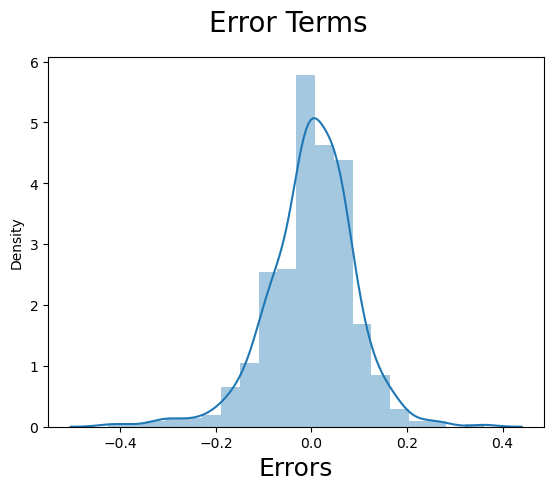

In [60]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

Error terms are following normal distribution

#### Checking Multi Colinearity

In [61]:
getVIF(X_train_new)

,Features,VIF
2,atemp,4.58
3,windspeed,3.91
0,year,2.05
9,spring,1.65
8,Misty,1.52
10,winter,1.41
4,july,1.35
5,sep,1.20
6,sun,1.18
7,Light_snowrain,1.08


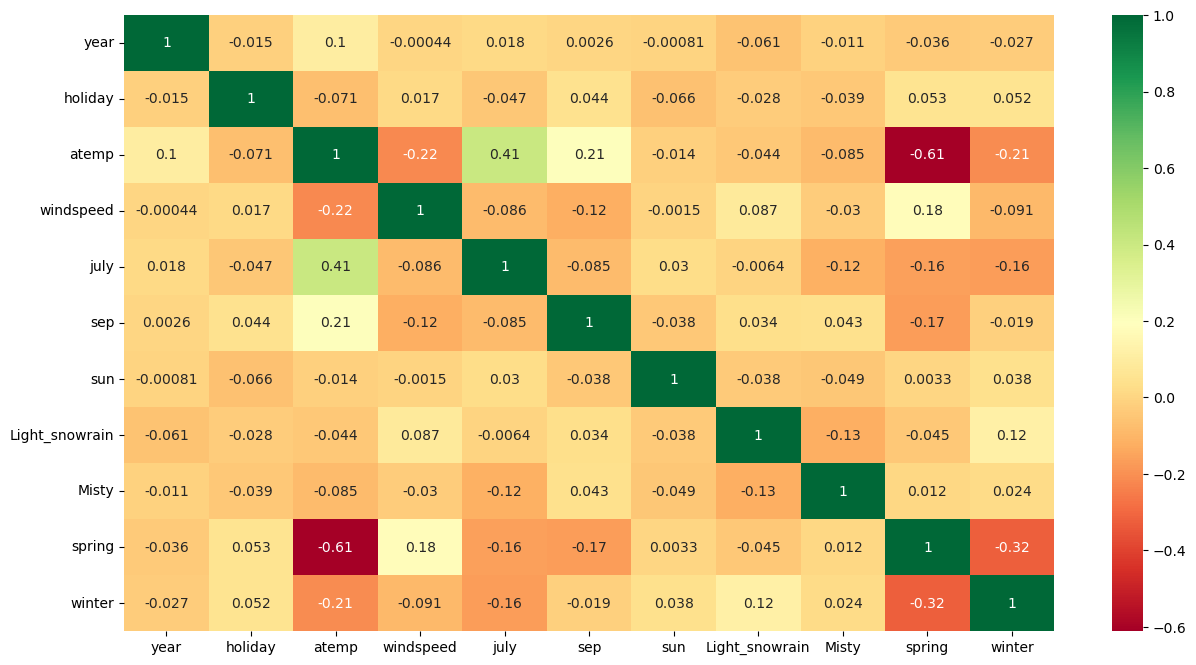

In [62]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

VIF values are less than 5 which is considered to be good, also there is no multicolinearity seen from the heatmap.

#### Checking Linearity

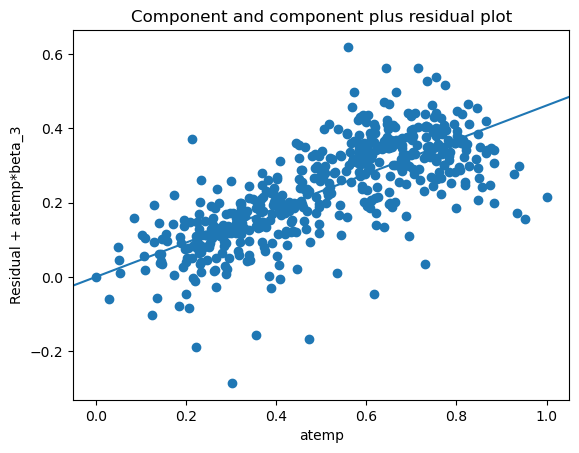

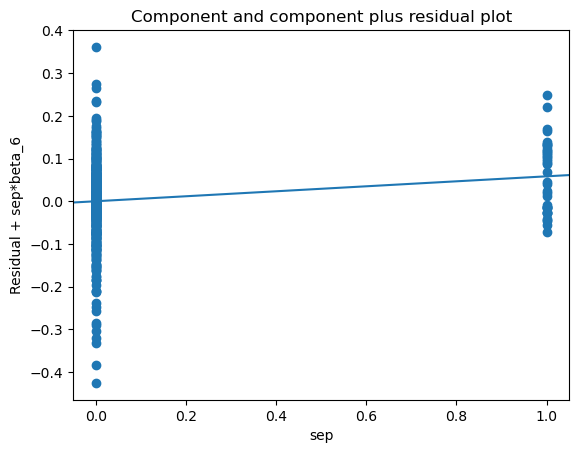

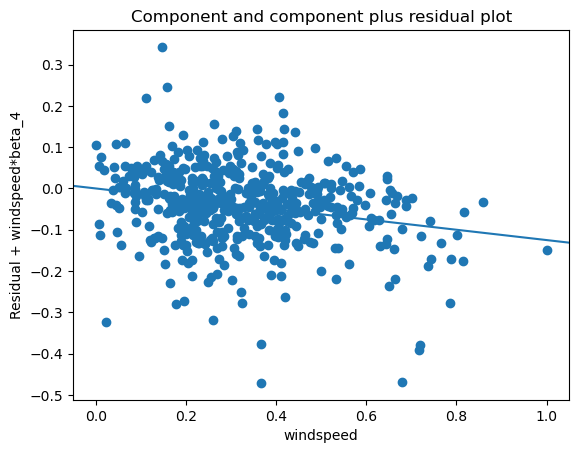

In [63]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_3, 'atemp')
plt.show()

sm.graphics.plot_ccpr(lr_3, 'sep')
plt.show()

sm.graphics.plot_ccpr(lr_3, 'windspeed')
plt.show()

Linearity can be observed from above visualizations.

#### Checking homoscedasticity

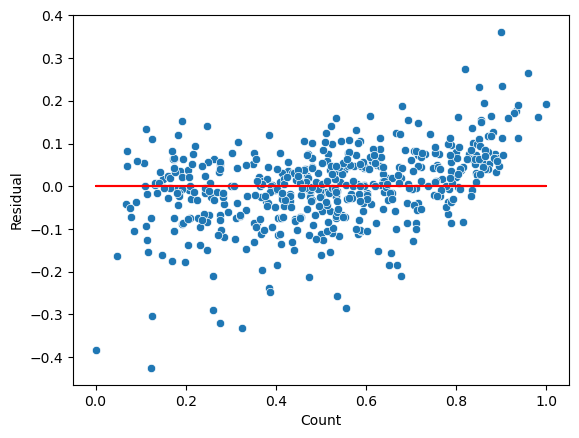

In [64]:
y_train_pred = lr_3.predict(X_train_lm_3)
residual = y_train - y_train_pred
sns.scatterplot(x = y_train,y = residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

No visible pattern observed from above plot for residuals.

#### Independence of residuals

Durbin-Watson value of final model is 2.041, which signifies there is no auto-correlation.

### Prediction using the model

In [65]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
ds_test[num_vars] = scaler.transform(ds_test[num_vars])
ds_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [66]:
ds_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [67]:
y_test = ds_test.pop('cnt')
X_test = ds_test

In [68]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_3 = sm.add_constant(X_test)

In [69]:
y_pred = lr_3.predict(X_test_lm_3)

In [70]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8129

### Model Evaluation

Text(0, 0.5, 'y_pred')

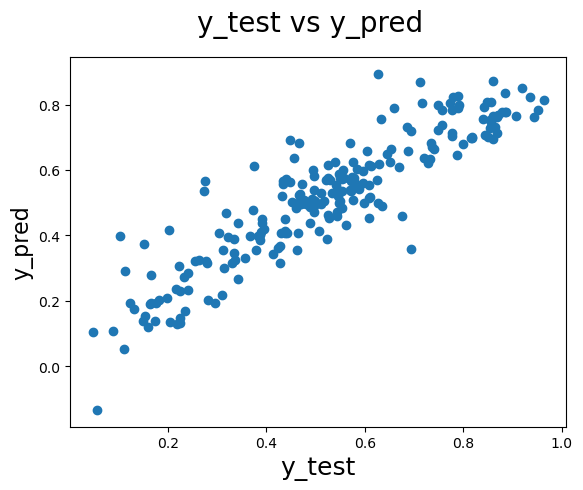

In [71]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [72]:
round(lr_3.params,4)

const             0.2629
year              0.2351
holiday          -0.1023
atemp             0.4619
windspeed        -0.1251
july             -0.0660
sep               0.0584
sun              -0.0483
Light_snowrain   -0.2863
Misty            -0.0823
spring           -0.1180
winter            0.0391
dtype: float64

#### We can see that the equation of our best fitted line is:

𝑐𝑛𝑡=0.2629+0.2351×𝑦𝑒𝑎𝑟−0.1023×ℎ𝑜𝑙𝑖𝑑𝑎𝑦+0.4619×a𝑡𝑒𝑚𝑝−0.1251×𝑤𝑖𝑛𝑑𝑠𝑝𝑒𝑒𝑑-0.0660xjuly+0.0584×𝑠𝑒𝑝-0.0483xsun-0.2863×𝐿𝑖𝑔ℎ𝑡_𝑠𝑛𝑜𝑤𝑟𝑎𝑖𝑛−0.0823×𝑀𝑖𝑠𝑡𝑦−0.1180×𝑠𝑝𝑟𝑖𝑛𝑔+0.0391×𝑤𝑖𝑛𝑡𝑒𝑟

In [73]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.803


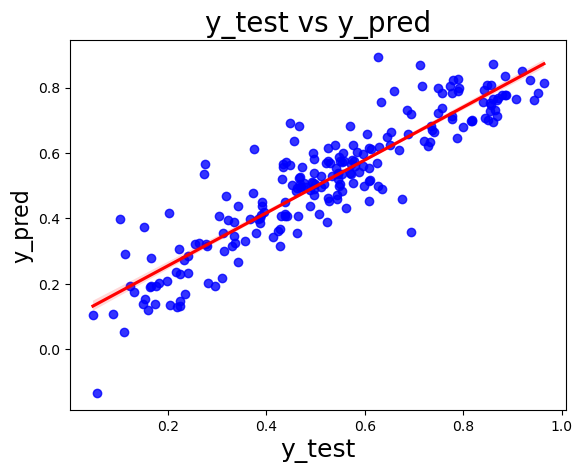

In [74]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

# Comparision between Training and Testing dataset:
    - Train dataset R^2          : 0.835
    - Test dataset R^2           : 0.8129
    - Train dataset Adjusted R^2 : 0.832    
    - Test dataset Adjusted R^2  : 0.803

#### Demand of bikes depend on year, holiday, atemp, windspeed, july, sep, sun, Light_snowrain, Misty, spring and winter.